### Case Study on Wifi Dataset : Data Modeling
Creator: Lisa Klinbuayam
Type: Classification model
Using Wifi Dataset: UJIIndoorLoc Data Set https://archive.ics.uci.edu/ml/datasets/ujiindoorloc

## Objective
`In this practice, we encouter training model by sample size of data to observe the model best fit by using the best-performance model we select. The KNN where K=3 is used in this practice.`

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, classification_report

In [8]:
# Read dataset (Training dataset)
train = pd.read_csv('trainingData.csv')
train.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [9]:
# Read dataset (Validation dataset)
test = pd.read_csv('validationData.csv')
test.head(5)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [10]:
# Drop unnecessary attributes
train.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID','TIMESTAMP'], axis=1, inplace=True)
test.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'SPACEID', 'RELATIVEPOSITION', 'USERID', 'PHONEID','TIMESTAMP'], axis=1, inplace=True)

In [11]:
# Slicing features and target
x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

`From the past exercise we concluded that KNN where K = 3 is the optimum value. Shown in the below reference.`

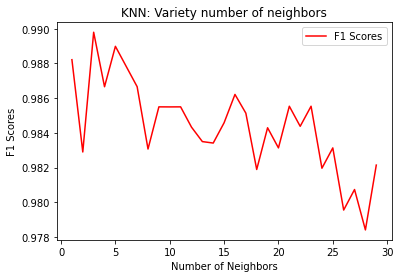

In [12]:
# Reference
no_neighbors = np.arange(1,30)
f1_scores = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    f1_scores[i] = f1_score(y_test, y_pred, average='macro')

# Plot the visualization
plt.title('KNN: Variety number of neighbors')
plt.plot(no_neighbors, f1_scores, label = 'F1 Scores', c='red')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Scores')
plt.show()

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       536
           1       0.97      0.98      0.98       307
           2       0.97      0.98      0.97       268

    accuracy                           0.98      1111
   macro avg       0.98      0.98      0.98      1111
weighted avg       0.98      0.98      0.98      1111



#### [Step 1]
Observe when increasing sample size to train the model for classification.

In [14]:
# [1] 20% samples
train_20 = train.sample(frac=0.2,random_state=1)
train_20

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
7107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-44,100,100,100,100,2
12603,100,100,100,100,100,100,100,-83,100,100,...,100,100,100,100,100,100,100,100,100,1
19424,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
12850,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
11311,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2
8941,100,100,100,100,100,100,-61,100,100,100,...,100,100,100,100,100,100,100,100,100,0
6111,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4166,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,2


In [15]:
F1_list = []

In [16]:
x_train = train_20.iloc[:,:-1]
y_train = train_20.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_20 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_20)
print(f'F1 Score of 20% sample size: {f1_scores_20:.3f}')

F1 Score of 20% sample size: 0.976


In [17]:
# [2] 40% samples
train_40 = train.sample(frac=0.4,random_state=1)
train_40

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
7107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-44,100,100,100,100,2
12603,100,100,100,100,100,100,100,-83,100,100,...,100,100,100,100,100,100,100,100,100,1
19424,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
12850,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
11311,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15228,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-70,100,100,100,100,2
2487,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-92,100,100,100,2
12914,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
10978,100,100,100,100,100,100,100,-84,100,100,...,100,100,100,100,100,100,100,100,100,1


In [18]:
x_train = train_40.iloc[:,:-1]
y_train = train_40.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_40 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_40)
print(f'F1 Score: {f1_scores_40:.3f}')

F1 Score: 0.987


In [19]:
# [2] 60% samples
train_60 = train.sample(frac=0.6,random_state=1)
train_60

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
7107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-44,100,100,100,100,2
12603,100,100,100,100,100,100,100,-83,100,100,...,100,100,100,100,100,100,100,100,100,1
19424,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
12850,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
11311,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-62,100,100,100,100,2
17994,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
25,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
4249,100,100,100,100,100,-91,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1


In [20]:
x_train = train_60.iloc[:,:-1]
y_train = train_60.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_60 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_60)
print(f'F1 Score: {f1_scores_60:.3f}')

F1 Score: 0.989


In [21]:
# [3] 80% sample
train_80 = train.sample(frac=0.8, random_state=1)
train_80

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
7107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-44,100,100,100,100,2
12603,100,100,100,100,100,100,100,-83,100,100,...,100,100,100,100,100,100,100,100,100,1
19424,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
12850,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
11311,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17171,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
12986,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-73,100,100,100,2
10481,100,100,100,100,100,100,100,100,-74,100,...,100,100,100,100,100,100,100,100,100,0
10558,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,-66,100,100,100,2


In [22]:
x_train = train_80.iloc[:,:-1]
y_train = train_80.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_80 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_80)
print(f'F1 Score: {f1_scores_80:.3f}')

F1 Score: 0.989


In [23]:
# [4] 100% sample
train_100 = train.sample(frac=1.0, random_state=1)
train_100

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
7107,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-44,100,100,100,100,2
12603,100,100,100,100,100,100,100,-83,100,100,...,100,100,100,100,100,100,100,100,100,1
19424,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
12850,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1
11311,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
17289,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,0
5192,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,-83,-76,100,100,100,2
12172,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,1


In [24]:
x_train = train_100.iloc[:,:-1]
y_train = train_100.iloc[:,-1]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
f1_scores_100 = f1_score(y_test, y_pred, average='macro')
F1_list.append(f1_scores_100)
print(f'F1 Score: {f1_scores_100:.3f}')

F1 Score: 0.990


#### [Step 2]
Discuss the efficiency of increasing the data size on the model we selected.

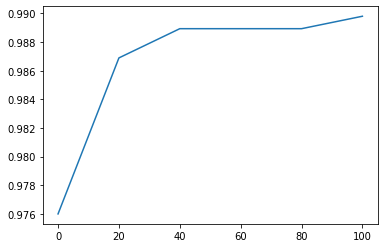

In [25]:
# plot graph
size = [0,20,40,80,100]
plt.plot(size,F1_list,label = 'F1 Scores')

In [26]:
# create a table
from tabulate import tabulate
sample_size = {'Sample Size':['20%','40%','60%','80%','100%'], 'F1 Scores': [f1_scores_20,f1_scores_40,f1_scores_60,f1_scores_80,f1_scores_100]}
print(tabulate(sample_size,headers='keys'))

Sample Size      F1 Scores
-------------  -----------
20%               0.976
40%               0.986892
60%               0.988932
80%               0.988932
100%              0.989801


### Conclusion

`By increasing 20% sample size of each time to observe the model performance, we found that efficiency of the model is also increased. In this case, we conclude that increasing sample size can make the model more efficiency. However, we select random samples - the accuracy scores always increasingly change but steepness could be different.`